# Symbolic Fourier Approximation Testing
We create time series that differ from the first one at one time point, at two time points and so on, up to ten time points where there is a difference. Then we want to transform them using sfa and measure the distances between the first and the others in the thus obtained space, using different similarity measures. 

In [1]:
import numpy as np
from pyts.approximation import SymbolicFourierApproximation
import matplotlib.pyplot as plt

In [2]:
# We are making a randon time series, with 48 time points
n_samples, n_timestamps = 1, 48
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

In [3]:
ts1 = np.copy(X[0])

In [4]:
ts_list = []
changed_indexes_list = []
ts_list.append(ts1)
changed_indexes_list.append([])

In [5]:
rng1 = np.random.RandomState(64)
for num_changed_indexes in range(1,11):
    ts_tmp = np.copy(ts1)
    changed_indexes = []
    for i in range(num_changed_indexes):
        index_to_change = rng1.randint(0, len(ts_tmp))
        # We dont want to repeat index
        while index_to_change in changed_indexes:
            index_to_change = rng1.randint(0, len(ts_tmp))
        ts_tmp[index_to_change] = rng1.normal()
        changed_indexes.append(index_to_change)
    
    ts_list.append(ts_tmp)
    changed_indexes_list.append(changed_indexes)

In [6]:
changed_indexes_list

[[],
 [4],
 [21, 31],
 [8, 34, 2],
 [6, 27, 12, 44],
 [18, 29, 35, 8, 7],
 [46, 27, 37, 41, 26, 36],
 [12, 29, 18, 4, 15, 24, 37],
 [41, 1, 37, 11, 35, 45, 8, 0],
 [43, 25, 27, 15, 20, 44, 0, 34, 24],
 [12, 31, 19, 29, 22, 11, 4, 27, 33, 46]]

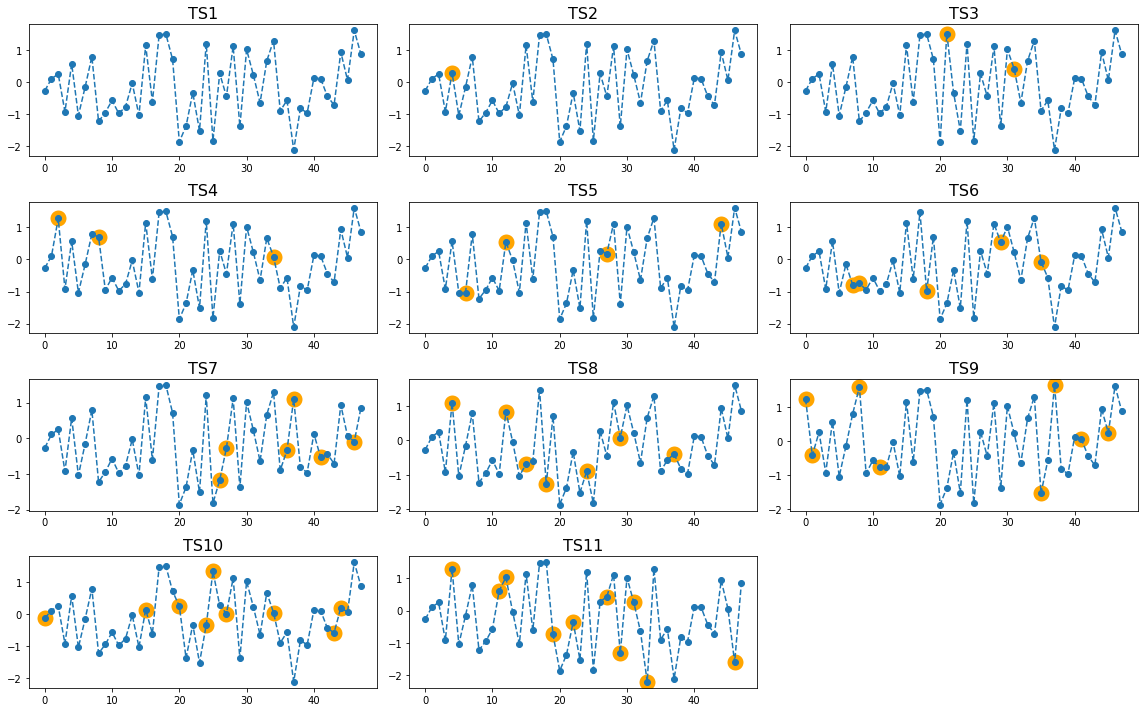

In [7]:
plt.figure(figsize=(16, 10))
plt.subplot(4,3, 1)
plt.plot(ts_list[0], 'o--') 
plt.title("TS1", fontsize=16)
plt.tight_layout()

for i in range(1,11):
    plt.subplot(4,3, i+1)
    plt.plot(ts_list[i], 'o--')
    plt.title("TS{}".format(i+1), fontsize=16)
    plt.scatter(changed_indexes_list[i], ts_list[i][changed_indexes_list[i]], color="orange", linewidths=10)
    plt.tight_layout()

In [8]:
stacked = np.array(ts_list)

In [29]:
transformer = SymbolicFourierApproximation(n_coefs=10, n_bins=5)
transformed_ts = transformer.fit_transform(stacked)
transformed_ts

array([['c', 'd', 'c', 'd', 'c', 'd', 'b', 'b', 'd', 'a'],
       ['b', 'c', 'c', 'c', 'd', 'd', 'c', 'b', 'd', 'a'],
       ['e', 'a', 'b', 'e', 'e', 'c', 'a', 'a', 'e', 'b'],
       ['d', 'd', 'a', 'd', 'b', 'b', 'c', 'a', 'c', 'd'],
       ['c', 'a', 'b', 'b', 'e', 'e', 'd', 'c', 'b', 'b'],
       ['a', 'b', 'e', 'c', 'a', 'e', 'e', 'e', 'a', 'a'],
       ['b', 'c', 'd', 'a', 'c', 'c', 'a', 'c', 'a', 'c'],
       ['a', 'e', 'e', 'b', 'a', 'b', 'd', 'd', 'c', 'e'],
       ['e', 'e', 'd', 'a', 'b', 'a', 'a', 'e', 'e', 'e'],
       ['d', 'a', 'a', 'e', 'd', 'a', 'b', 'a', 'b', 'd'],
       ['a', 'b', 'a', 'a', 'a', 'a', 'e', 'd', 'a', 'c']], dtype='<U1')

###  Simple Different Characters Count

In [30]:
def num_of_diif_chars(x,y):
    unique, counts = np.unique(x == y, return_counts=True)
    d = dict(zip(unique, counts))
    f = False
    if f in d.keys():
        return d[False]
    else:
        return 0

In [31]:
print("Different characters count")
for i in range(1,11):
    d = num_of_diif_chars(transformed_ts[0], transformed_ts[i])
    print("0 --> {}  :".format(i), d)

Different characters count
0 --> 1  : 5
0 --> 2  : 10
0 --> 3  : 8
0 --> 4  : 9
0 --> 5  : 9
0 --> 6  : 9
0 --> 7  : 10
0 --> 8  : 10
0 --> 9  : 9
0 --> 10  : 10


### Edit Distance (Levenshtein Distance)

In [32]:
from nltk.metrics.distance import edit_distance

In [33]:
def stringify(x):
    s = ""
    for i in x:
        s += i
    return s

In [34]:
print("Edite distance")
for i in range(1,11):
    d = edit_distance(stringify(transformed_ts[0]), stringify(transformed_ts[i]))
    print("0 --> {}  :".format(i), d)

Edite distance
0 --> 1  : 4
0 --> 2  : 10
0 --> 3  : 6
0 --> 4  : 8
0 --> 5  : 9
0 --> 6  : 8
0 --> 7  : 9
0 --> 8  : 10
0 --> 9  : 7
0 --> 10  : 9


### Sequence Matcher
The idea is to find the longest contiguous matching subsequence that contains no “junk” elements; these “junk” elements are ones that are uninteresting in some sense, such as blank lines or whitespace

In [35]:
from difflib import SequenceMatcher

In [36]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [37]:
print("Sequence Matcher")
for i in range(1,11):
    d = similar(stringify(transformed_ts[0]), stringify(transformed_ts[i]))
    print("0 --> {}  :".format(i), d)

Sequence Matcher
0 --> 1  : 0.7
0 --> 2  : 0.2
0 --> 3  : 0.6
0 --> 4  : 0.5
0 --> 5  : 0.2
0 --> 6  : 0.5
0 --> 7  : 0.2
0 --> 8  : 0.2
0 --> 9  : 0.5
0 --> 10  : 0.3


### Gunpoint dataset
This dataset involves one female actor and one male actor making a motion with their hand. The two classes are: Gun-Draw and Point: For Gun-Draw the actors have their hands by their sides. They draw a replicate gun from a hip-mounted holster, point it at a target for approximately one second, then return the gun to the holster, and their hands to their sides. For Point the actors have their gun by their sides. They point with their index fingers to a target for approximately one second, and then return their hands to their sides. For both classes, we tracked the centroid of the actor’s right hands in both X- and Y-axes, which appear to be highly correlated. The data in the archive is just the X-axis.

We will try to measure the distances between transformed instances from this set since all time series are quite similar.

In [58]:
from pyts.datasets import load_gunpoint
X, _, y, _ = load_gunpoint(return_X_y=True)
X.shape, y.shape

((50, 150), (50,))

In [59]:
y

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2], dtype=int64)

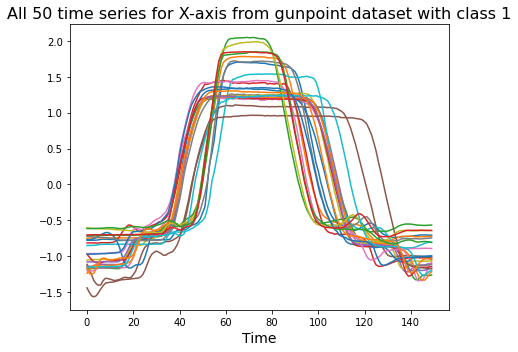

In [63]:
plt.figure(figsize=(6, 5))
for i in range(X.shape[0]):
    if y[i] == 1:
        plt.plot(X[i], '-')
plt.xlabel('Time', fontsize=14)
plt.title('All 50 time series for X-axis from gunpoint dataset with class 1', fontsize=16)
plt.tight_layout()
plt.show()

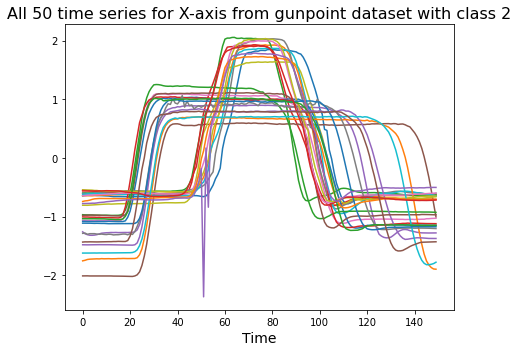

In [65]:
plt.figure(figsize=(6, 5))
for i in range(X.shape[0]):
    if y[i] == 2:
        plt.plot(X[i], '-')
plt.xlabel('Time', fontsize=14)
plt.title('All 50 time series for X-axis from gunpoint dataset with class 2', fontsize=16)
plt.tight_layout()
plt.show()

In [66]:
transformer = SymbolicFourierApproximation(n_coefs=4, n_bins=4)
X_new = transformer.fit_transform(X)
X_new.shape

(50, 4)

In [67]:
X_new

array([['b', 'd', 'd', 'c'],
       ['b', 'c', 'c', 'd'],
       ['a', 'b', 'd', 'c'],
       ['d', 'b', 'c', 'c'],
       ['d', 'd', 'a', 'd'],
       ['a', 'c', 'a', 'd'],
       ['b', 'b', 'b', 'a'],
       ['b', 'd', 'd', 'a'],
       ['d', 'd', 'a', 'b'],
       ['c', 'a', 'c', 'b'],
       ['d', 'b', 'a', 'c'],
       ['a', 'a', 'c', 'b'],
       ['d', 'a', 'd', 'a'],
       ['d', 'a', 'b', 'b'],
       ['d', 'd', 'c', 'd'],
       ['c', 'a', 'c', 'b'],
       ['c', 'b', 'd', 'c'],
       ['b', 'c', 'd', 'd'],
       ['b', 'a', 'b', 'b'],
       ['c', 'c', 'a', 'a'],
       ['c', 'b', 'd', 'c'],
       ['b', 'a', 'b', 'c'],
       ['c', 'a', 'c', 'b'],
       ['a', 'd', 'd', 'a'],
       ['c', 'd', 'b', 'd'],
       ['d', 'd', 'a', 'a'],
       ['d', 'a', 'b', 'b'],
       ['c', 'a', 'b', 'b'],
       ['a', 'd', 'a', 'b'],
       ['c', 'c', 'd', 'a'],
       ['d', 'b', 'a', 'c'],
       ['b', 'b', 'd', 'a'],
       ['a', 'd', 'a', 'b'],
       ['d', 'b', 'c', 'c'],
       ['c', '

### First we are comparing one random time series from calss 1 to all other from class 1

In [108]:
rng1 = np.random.RandomState(128)
chosen_index = rng1.randint(0, len(X))
while y[chosen_index] != 1:
    chosen_index = rng1.randint(0, len(X))

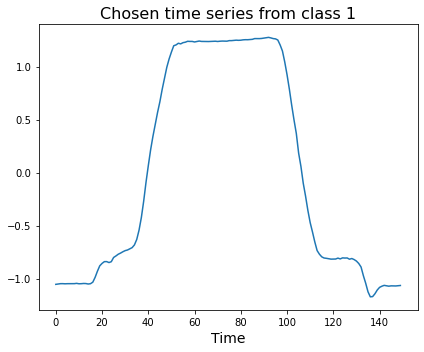

In [109]:
plt.figure(figsize=(6, 5))
plt.plot(X[chosen_index], '-')
plt.xlabel('Time', fontsize=14)
plt.title('Chosen time series from class 1', fontsize=16)
plt.tight_layout()
plt.show()

###  Simple Different Characters Count - class1 

In [110]:
print("Different characters count")
for i in range(X_new.shape[0]):
    if y[chosen_index] == y[i]:
        d = num_of_diif_chars(X_new[chosen_index], X_new[i])
        print("{} --> {}  :".format(chosen_index,i), d)

Different characters count
18 --> 2  : 4
18 --> 3  : 4
18 --> 9  : 2
18 --> 10  : 4
18 --> 11  : 2
18 --> 12  : 3
18 --> 13  : 1
18 --> 15  : 2
18 --> 18  : 0
18 --> 20  : 4
18 --> 21  : 1
18 --> 22  : 2
18 --> 24  : 3
18 --> 26  : 1
18 --> 27  : 1
18 --> 29  : 4
18 --> 30  : 4
18 --> 33  : 4
18 --> 35  : 4
18 --> 41  : 1
18 --> 42  : 4
18 --> 43  : 2
18 --> 46  : 3
18 --> 48  : 3


We plot the time series with the least different characters compared to the selected one.

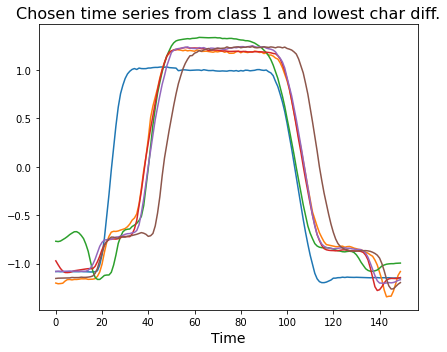

In [125]:
plt.figure(figsize=(6, 5))
plt.plot(X[chosen_index], '-')
plt.plot(X[13], '-')
plt.plot(X[21], '-')
plt.plot(X[26], '-')
plt.plot(X[27], '-')
plt.plot(X[41], '-')
plt.xlabel('Time', fontsize=14)
plt.title('Chosen time series from class 1 and lowest char diff.', fontsize=16)
plt.tight_layout()
plt.show()

### Edit Distance (Levenshtein Distance) - class1

In [111]:
print("Edite distance")
for i in range(X_new.shape[0]):
    if y[chosen_index] == y[i]:
        d = edit_distance(stringify(X_new[chosen_index]), stringify(X_new[i]))
        print("{} --> {}  :".format(chosen_index,i), d)

Edite distance
18 --> 2  : 3
18 --> 3  : 4
18 --> 9  : 2
18 --> 10  : 3
18 --> 11  : 2
18 --> 12  : 3
18 --> 13  : 1
18 --> 15  : 2
18 --> 18  : 0
18 --> 20  : 4
18 --> 21  : 1
18 --> 22  : 2
18 --> 24  : 3
18 --> 26  : 1
18 --> 27  : 1
18 --> 29  : 4
18 --> 30  : 3
18 --> 33  : 4
18 --> 35  : 4
18 --> 41  : 1
18 --> 42  : 3
18 --> 43  : 2
18 --> 46  : 3
18 --> 48  : 3


We plot the time series with the lowest edit distance compared to the selected one. Note that these are the same time series as in the first case.

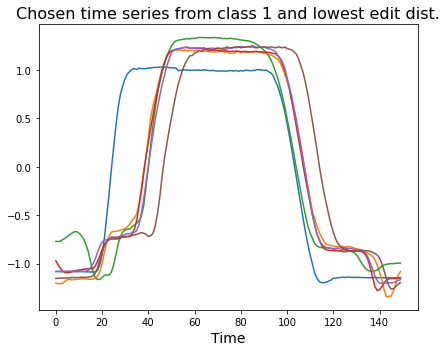

In [126]:
plt.figure(figsize=(6, 5))
plt.plot(X[chosen_index], '-')
plt.plot(X[13], '-')
plt.plot(X[21], '-')
plt.plot(X[26], '-')
plt.plot(X[27], '-')
plt.plot(X[41], '-')
plt.xlabel('Time', fontsize=14)
plt.title('Chosen time series from class 1 and lowest edit dist.', fontsize=16)
plt.tight_layout()
plt.show()

### Sequence Matcher - class1

In [112]:
print("Sequence Matcher")
for i in range(X_new.shape[0]):
    if y[chosen_index] == y[i]:
        d = similar(stringify(X_new[chosen_index]), stringify(X_new[i]))
        print("{} --> {}  :".format(chosen_index,i), d)

Sequence Matcher
18 --> 2  : 0.5
18 --> 3  : 0.25
18 --> 9  : 0.25
18 --> 10  : 0.5
18 --> 11  : 0.25
18 --> 12  : 0.25
18 --> 13  : 0.75
18 --> 15  : 0.25
18 --> 18  : 1.0
18 --> 20  : 0.25
18 --> 21  : 0.75
18 --> 22  : 0.25
18 --> 24  : 0.25
18 --> 26  : 0.75
18 --> 27  : 0.75
18 --> 29  : 0.25
18 --> 30  : 0.5
18 --> 33  : 0.25
18 --> 35  : 0.25
18 --> 41  : 0.75
18 --> 42  : 0.5
18 --> 43  : 0.5
18 --> 46  : 0.25
18 --> 48  : 0.25


We plot the time series with the highest similarity ratio compared to the selected one. Note that these are the same time series as in the first case as well as the second case.

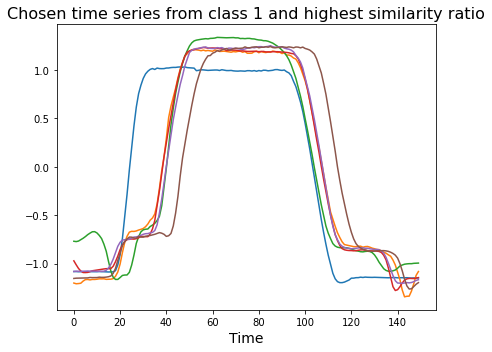

In [127]:
plt.figure(figsize=(6, 5))
plt.plot(X[chosen_index], '-')
plt.plot(X[13], '-')
plt.plot(X[21], '-')
plt.plot(X[26], '-')
plt.plot(X[27], '-')
plt.plot(X[41], '-')
plt.xlabel('Time', fontsize=14)
plt.title('Chosen time series from class 1 and highest similarity ratio', fontsize=16)
plt.tight_layout()
plt.show()

### Same thing for calss 2

In [113]:
rng1 = np.random.RandomState(128)
chosen_index = rng1.randint(0, len(X))
while y[chosen_index] != 2:
    chosen_index = rng1.randint(0, len(X))

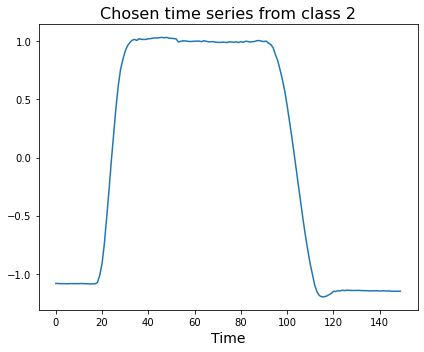

In [114]:
plt.figure(figsize=(6, 5))
plt.plot(X[chosen_index], '-')
plt.xlabel('Time', fontsize=14)
plt.title('Chosen time series from class 2', fontsize=16)
plt.tight_layout()
plt.show()

###  Simple Different Characters Count - class2

In [116]:
print("Different characters count")
for i in range(X_new.shape[0]):
    if y[chosen_index] == y[i]:
        d = num_of_diif_chars(X_new[chosen_index], X_new[i])
        print("{} --> {}  :".format(chosen_index,i), d)

Different characters count
19 --> 0  : 4
19 --> 1  : 3
19 --> 4  : 3
19 --> 5  : 2
19 --> 6  : 3
19 --> 7  : 3
19 --> 8  : 3
19 --> 14  : 4
19 --> 16  : 3
19 --> 17  : 3
19 --> 19  : 0
19 --> 23  : 3
19 --> 25  : 2
19 --> 28  : 3
19 --> 31  : 3
19 --> 32  : 3
19 --> 34  : 3
19 --> 36  : 3
19 --> 37  : 4
19 --> 38  : 1
19 --> 39  : 2
19 --> 40  : 3
19 --> 44  : 1
19 --> 45  : 3
19 --> 47  : 4
19 --> 49  : 3


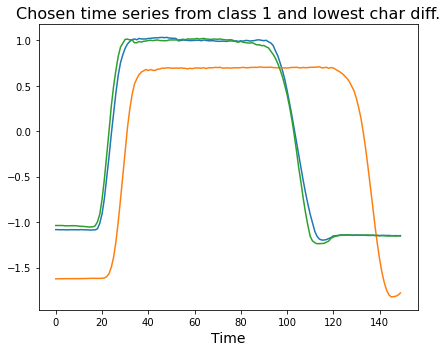

In [128]:
plt.figure(figsize=(6, 5))
plt.plot(X[chosen_index], '-')
plt.plot(X[38], '-')
plt.plot(X[44], '-')
plt.xlabel('Time', fontsize=14)
plt.title('Chosen time series from class 1 and lowest char diff.', fontsize=16)
plt.tight_layout()
plt.show()

### Edit Distance (Levenshtein Distance) - class2

In [117]:
print("Edite distance")
for i in range(X_new.shape[0]):
    if y[chosen_index] == y[i]:
        d = edit_distance(stringify(X_new[chosen_index]), stringify(X_new[i]))
        print("{} --> {}  :".format(chosen_index,i), d)

Edite distance
19 --> 0  : 4
19 --> 1  : 3
19 --> 4  : 3
19 --> 5  : 2
19 --> 6  : 3
19 --> 7  : 3
19 --> 8  : 3
19 --> 14  : 4
19 --> 16  : 3
19 --> 17  : 3
19 --> 19  : 0
19 --> 23  : 3
19 --> 25  : 2
19 --> 28  : 3
19 --> 31  : 3
19 --> 32  : 3
19 --> 34  : 3
19 --> 36  : 3
19 --> 37  : 4
19 --> 38  : 1
19 --> 39  : 2
19 --> 40  : 3
19 --> 44  : 1
19 --> 45  : 3
19 --> 47  : 4
19 --> 49  : 3


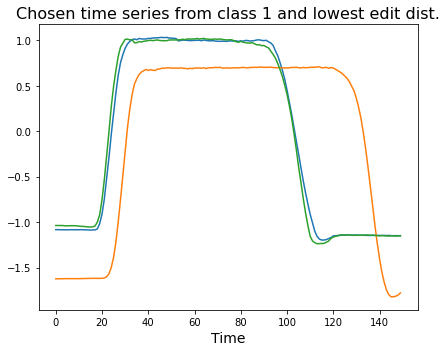

In [129]:
plt.figure(figsize=(6, 5))
plt.plot(X[chosen_index], '-')
plt.plot(X[38], '-')
plt.plot(X[44], '-')
plt.xlabel('Time', fontsize=14)
plt.title('Chosen time series from class 1 and lowest edit dist.', fontsize=16)
plt.tight_layout()
plt.show()

### Sequence Matcher - class2

In [118]:
print("Sequence Matcher")
for i in range(X_new.shape[0]):
    if y[chosen_index] == y[i]:
        d = similar(stringify(X_new[chosen_index]), stringify(X_new[i]))
        print("{} --> {}  :".format(chosen_index,i), d)

Sequence Matcher
19 --> 0  : 0.25
19 --> 1  : 0.5
19 --> 4  : 0.25
19 --> 5  : 0.5
19 --> 6  : 0.25
19 --> 7  : 0.25
19 --> 8  : 0.25
19 --> 14  : 0.25
19 --> 16  : 0.5
19 --> 17  : 0.25
19 --> 19  : 1.0
19 --> 23  : 0.5
19 --> 25  : 0.5
19 --> 28  : 0.5
19 --> 31  : 0.25
19 --> 32  : 0.5
19 --> 34  : 0.5
19 --> 36  : 0.5
19 --> 37  : 0.25
19 --> 38  : 0.75
19 --> 39  : 0.5
19 --> 40  : 0.5
19 --> 44  : 0.75
19 --> 45  : 0.25
19 --> 47  : 0.0
19 --> 49  : 0.5


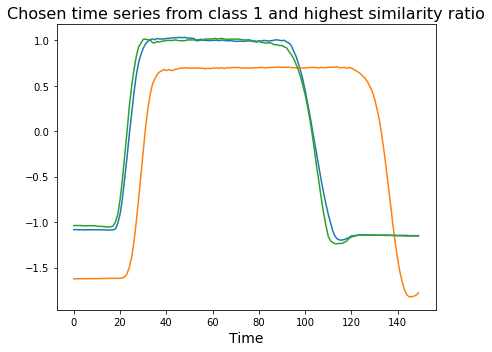

In [130]:
plt.figure(figsize=(6, 5))
plt.plot(X[chosen_index], '-')
plt.plot(X[38], '-')
plt.plot(X[44], '-')
plt.xlabel('Time', fontsize=14)
plt.title('Chosen time series from class 1 and highest similarity ratio', fontsize=16)
plt.tight_layout()
plt.show()

Again, same results for all three cases in case of class 2. Same two series are the most similar to the choces one in all cases.